
1. Consider the following optimization problem:   

 max x
 
 $x_1+\frac{1}{4}x_2$
 
 $\frac{1}{2}x_1+x_2 \leq{1}$
 
 $2x_1+x_2\leq{2}$
 
 $x_1 \geq{0}, x_2\geq{0}$   
 


 



A. Guess the solution. Plot the constraints and the objective function. Justify your guess.

First glance, the solution seems to be $x_1=1$ and and $x_2=0$ becasue the objective function has multiplier 1 for $x_1$ and one of the constrains could be maximized at 2 when $x_1$ is 1 and $x_0$ is 0, while all other constraints met. We also expect corner solution from linear programming

Below is the feasable region for the set of conditions similar to the course example

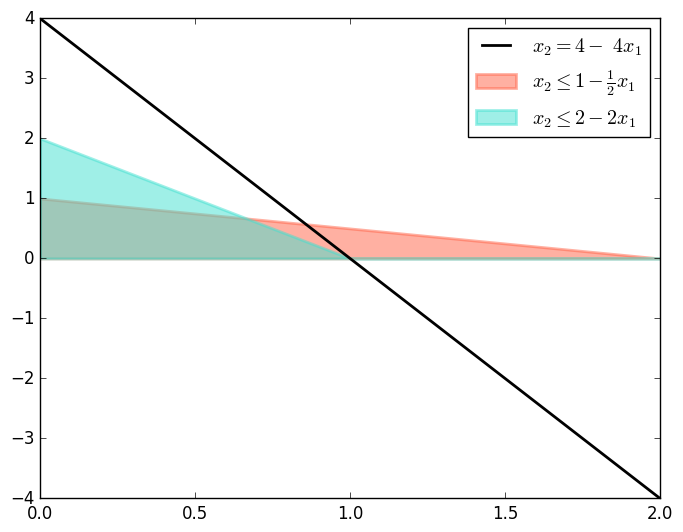

PyObject <matplotlib.legend.Legend object at 0x7f735031b6d8>

In [1]:
using PyPlot


x1 = collect(0:0.1:2)
x2a = 1-0.5*x1
x2b = ifelse(2-2*x1.>=0,2-2*x1,0)
x2c = 4-4*x1

fig, ax = subplots()

ax[:fill_between](x1,x2a,color="tomato",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.5)
ax[:legend](loc="upper right")
#ax[:legend]()


ax[:fill_between](x1,x2b,color="turquoise",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.5)

ax[:legend](loc="upper right")
#legend(loc="upper right",fancybox="true")
#ax[:legend]()

ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 4 - \ 4x_{1}",alpha=1)
ax[:legend](loc="upper right")

B. Using Julia define and solve the above problem "as is".

In [2]:
#Pkg.add("JuMP")

In [3]:
#Pkg.add("GLPKMathProgInterface")

In [13]:
using JuMP
using GLPKMathProgInterface

myModel = Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x1+0.25*x2)
myModel

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [14]:
@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000150 seconds (199 allocations: 8.672 KB)
Objective value: 1.0
x1 = 1.0
x2 = 0.0


Solution is similar to what was expected

C. Rewrite in a standard form


$max$ $x$   

$x_1+\frac{1}{4}x_2$

$\frac{1}{2}x_1+x_2+x_3=1$

$2x_1+x_2+x_4=2$

$x_1 \geq{0}, x_2\geq{0},x_3\geq{0},x_4\geq{0} $ 

 

D. Using Julia define and solve the above problem in a standard form.

In [15]:
using JuMP
using GLPKMathProgInterface

myModel2 = Model(solver=GLPKSolverLP())
@variable(myModel2, x1 >= 0)
@variable(myModel2, x2 >= 0)
@variable(myModel2, x3 >= 0)
@variable(myModel2, x4 >= 0)
@constraint(myModel2, 0.5*x1 + x2 + x3 == 1)
@constraint(myModel2, 2*x1 + x2 + x4 == 2)
@objective(myModel2, Min, -x1-0.25*x2)
myModel2

Minimization problem with:
 * 2 linear constraints
 * 4 variables
Solver is GLPKInterfaceLP

In [7]:
@time begin
    status = solve(myModel2)
end
println("Objective value: ", getobjectivevalue(myModel2))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))
println("x3 = ", getvalue(x3))
println("x4 = ", getvalue(x4))

  0.000206 seconds (245 allocations: 9.969 KB)
Objective value: -1.0
x1 = 1.0
x2 = 0.0
x3 = 0.5
x4 = 0.0


E. Compare the solution in items B and D.

The solution for x1 and x2 are the same. The only differnce is the objective function that we are minimizing.

F.Rework items A nad B if the objective is $x_1+x_2$

My gues is that x1=x2 as the objective function as the objective is indifferent (same weight) and with that assumption we can reduce the number of contsraints and re write 0.5x1 + x2 <= 1 as 2(0.5x1 + x2) <= 21 which is X1+2X2<=2, which is same as 2x1 + x2 <= 2 if X1=X2. Then we can solve for 3x1 = 2-->x1=x2=2/3


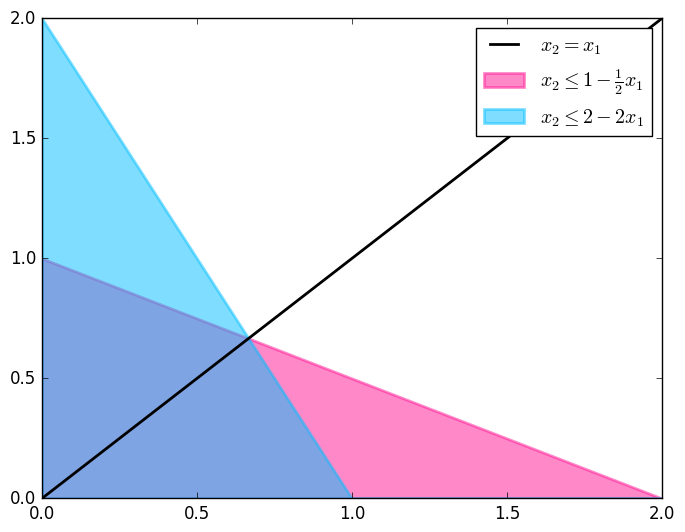

PyObject <matplotlib.legend.Legend object at 0x7f734f82f390>

In [16]:
using PyPlot

x1 = collect(0:0.1:2)
x2a = 1-0.5*x1
x2b = ifelse(2-2*x1.>=0,2-2*x1,0)
x2c = x1

fig, ax = subplots()

ax[:fill_between](x1,x2a,color="deeppink",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.5)
ax[:legend](loc="upper right")
#ax[:legend]()


ax[:fill_between](x1,x2b,color="deepskyblue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.5)

ax[:legend](loc="upper right")
#legend(loc="upper right",fancybox="true")
#ax[:legend]()

ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = x_{1}",alpha=1)
ax[:legend](loc="upper right")

In [22]:
using JuMP
using GLPKMathProgInterface


myModel3 = Model(solver=GLPKSolverLP())
@variable(myModel3, x1 >= 0)
@variable(myModel3, x2 >= 0)
@constraint(myModel3, 0.5*x1 + x2 <= 1)
@constraint(myModel3, 2*x1 + x2 <= 2)
@objective(myModel3, Max, x1+x2)
myModel3

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [24]:
@time begin
    status = solve(myModel3)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000172 seconds (199 allocations: 8.672 KB)
Objective value: 1.0
x1 = 0.6666666666666667
x2 = 0.6666666666666666
